# Graph Analysis Techniques without Feature Learning

# Dimensionality reduction with graphs

## Lab 3 : LLE

### Xavier Bresson  


In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/GML2023_codes/codes/03_Traditional_GML/04_dim_reduc'
    print(path_to_file)
    # change current path to the folder containing "path_to_file"
    os.chdir(path_to_file)
    !pwd

In [2]:
# Load libraries

# Math
import numpy as np

# Import data
import scipy.io

# Visualization 
%matplotlib inline
#%matplotlib notebook 
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import time

# Import functions in lib folder
import sys
sys.path.insert(0, 'lib/')

# Import helper functions
%load_ext autoreload
%autoreload 2
from lib.utils import compute_pca
from lib.utils import construct_knn_graph
from lib.utils import nldr_visualization
from lib.utils import construct_kernel

# Import
import scipy.sparse.linalg
import time
import scipy.ndimage

# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Swiss roll data (by Kye Taylor)
mat = scipy.io.loadmat('datasets/swiss_roll.mat')
X = mat['X']
Xref = X
n = X.shape[0]
d = X.shape[1]
Cgt = mat['Cgt'].squeeze()
print(n,d)

2048 3


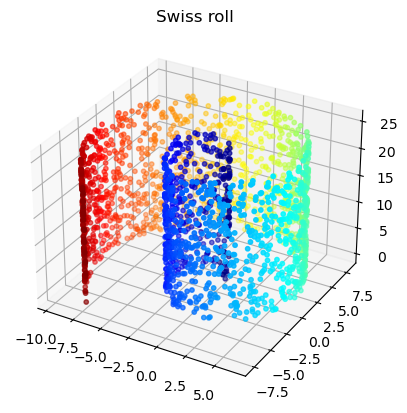

In [4]:
# Plot
fig = pylab.figure(1)
ax = fig.add_subplot(projection='3d')
size_vertex_plot = 10
ax.scatter(X[:,0],X[:,1],X[:,2], s=size_vertex_plot*np.ones(n), c=Cgt, color=pyplot.jet())
plt.title('Swiss roll') 
pyplot.show() 

In [5]:
# Run NLDR = LLE
X = Xref
X = X - np.mean(X,axis=0) # zero-centered data

# Step 1: Compute k-NN
kNN = 20
WkNN = construct_knn_graph(X,kNN,'euclidean').todense()

# Step 2: Compute locally linear patches
W = np.zeros([n,n])
for i in range(n): 
    # Find neighbors of data i
    idx_kNN = np.where(WkNN[i,:]>0.0)[1]
    K = len(idx_kNN)
    if K>kNN:
        K = kNN 
        idx_kNN = idx_kNN[:K]
    XkNN = X[idx_kNN,:]
    Ones = np.ones([K,1])
    C = (X[i,:][:,None].dot(Ones.T) - XkNN.T).T    
    C = C.dot(C.T)
    # if K (nb nearest neighbors) > d (data dimensionality) then regularization is required
    C = C + 1e-1* np.eye(K)#* trace(C)
    t,_ = scipy.sparse.linalg.cg(C, Ones)
    t = t/ (Ones.T.dot(t))
    W[i,idx_kNN] = t

k-NN graph with euclidean distance


In [6]:
# Step 3: Compute low-dim embedding coordinates
M = ( np.eye(n) - W.T ).dot( np.eye(n) - W ) 
# EVD
lamb, U = np.linalg.eig(M)
def sortEVD(lamb, U):
    idx = lamb.argsort()
    return lamb[idx], U[:,idx]
lamb, U = sortEVD(lamb, U)
print(lamb[:4])
Xnldr_LLE = U[:,1]
Ynldr_LLE = U[:,2]
Znldr_LLE = U[:,3]

[1.11683717e-15 8.74568471e-09 1.08868590e-07 4.19852048e-07]


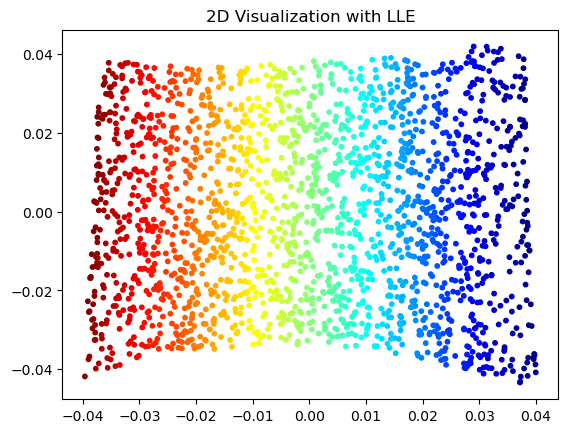

In [7]:
# 2D Plot
plt.figure(2)
size_vertex_plot = 10
plt.scatter(Xnldr_LLE, Ynldr_LLE, s=size_vertex_plot*np.ones(n), c=Cgt, color=pyplot.jet())
plt.title('2D Visualization with LLE') 
plt.show()

In [8]:
# Run NLDR = Laplacian Eigenmaps
W = construct_knn_graph(X,kNN,'euclidean')
Xnldr_lapeigmap,Ynldr_lapeigmap,Znldr_lapeigmap = nldr_visualization(W)

k-NN graph with euclidean distance


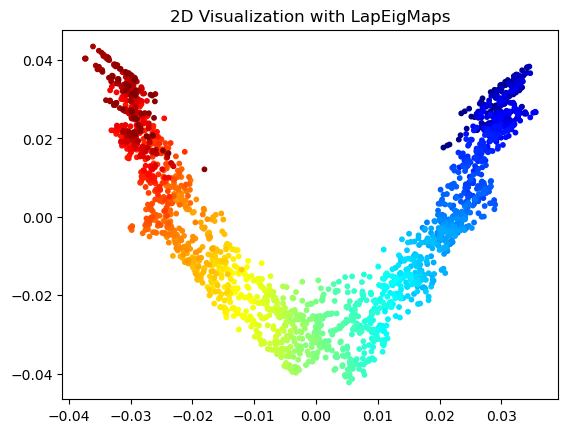

In [9]:
# 2D Plot
plt.figure(3)
size_vertex_plot = 10
plt.scatter(Xnldr_lapeigmap, Ynldr_lapeigmap, s=size_vertex_plot*np.ones(n), c=Cgt, color=pyplot.jet())
plt.title('2D Visualization with LapEigMaps') 
plt.show()

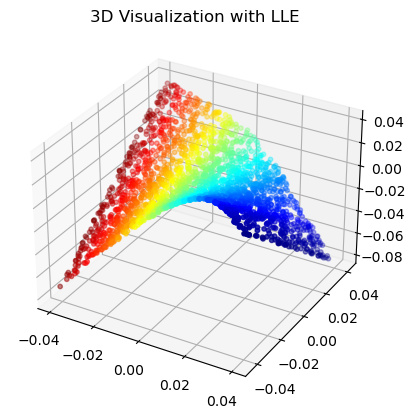

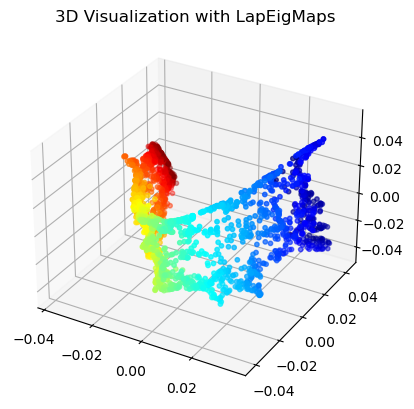

In [10]:
# 3D Plot
fig = pylab.figure(4)
ax = fig.add_subplot(projection='3d')
size_vertex_plot = 10
ax.scatter(Xnldr_LLE, Ynldr_LLE, Znldr_LLE, s=size_vertex_plot*np.ones(n), c=Cgt, color=pyplot.jet())
plt.title('3D Visualization with LLE') 
pyplot.show()

fig = pylab.figure(5)
ax = fig.add_subplot(projection='3d')
size_vertex_plot = 10
ax.scatter(Xnldr_lapeigmap, Ynldr_lapeigmap, Znldr_lapeigmap, s=size_vertex_plot*np.ones(n), c=Cgt, color=pyplot.jet())
plt.title('3D Visualization with LapEigMaps') 
pyplot.show()
